In [39]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from shapely.geometry import Point, LineString, Polygon
import numpy as np

plt.ion()

In [40]:
# generate matplotlib handles to create a legend of the features we put in our map.
def generate_handles(labels, colors, edge='k', alpha=1):
    """For generating a legend

       Args: labels are the data labels
             colors will assign a colour
             edge is the colour of the label boundary
             alpha controls the transparency
    """
    lcolors = len(colors)
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lcolors], edgecolor=edge, alpha=alpha))
    return handles

# create a scale bar of length 20 km in the upper right corner of the map
# adapted this question: https://stackoverflow.com/q/32333870
# answered by SO user Siyh: https://stackoverflow.com/a/35705477

def scale_bar(ax, length=None, location=(0.85, 0.05), unit='km', linewidth='4'):
    """This function creates a scale bar

        args: ax is the axis to draw the scale bar
              length is the length of the scale bar in km
              location the  center of the scalebar in the axis coordinates
              linewidth is the thickness of the scalebar
              units is the name of the unit


    """

    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    sbllx = (llx1 + llx0) / 2  # centres the scale bar
    sblly = lly0 + (lly1 - lly0) * location[1]

    tmc = ccrs.TransverseMercator(sbllx, sblly)
    x0, x1, y0, y1 = ax.get_extent(tmc)  # extent of the map in metres.
    sbx = x0 + (x1 - x0) * location[0]  # plot the x location
    sby = y0 + (y1 - y0) * location[1]  # ploy the y location

    plt.plot([sbx, sbx - 20000], [sby, sby], color='k', linewidth=6, transform=tmc)
    plt.plot([sbx, sbx - 10000], [sby, sby], color='k', linewidth=4, transform=tmc)
    plt.plot([sbx-10000, sbx - 20000], [sby, sby], color='w', linewidth=4, transform=tmc)

    plt.text(sbx, sby-4500, '20 km', transform=tmc, fontsize=8)
    plt.text(sbx-12500, sby-4500, '10 km', transform=tmc, fontsize=8)
    plt.text(sbx-24500, sby-4500, '0 km', transform=tmc, fontsize=8)

In [41]:
#load the data

NIOutline = gpd.read_file('Shapefiles/NI_Outline.shp')
MPAs = gpd.read_file('Shapefiles/UKSeaMap 2018 NI Inshore Clip.shp')

In [42]:
#make sure the shapefiles have the correct crs.

NIOutline = NIOutline.to_crs(epsg=32629)
MPAs = MPAs.to_crs(epsg=32629)

In [43]:
if NIOutline.crs == MPAs.crs:    # test the crs
    print('The NIOutline and MPAs crs are the same:', NIOutline.crs, MPAs.crs)
else:
    print('They do not have the same crs.')

The NIOutline and MPAs crs are the same: epsg:32629 epsg:32629


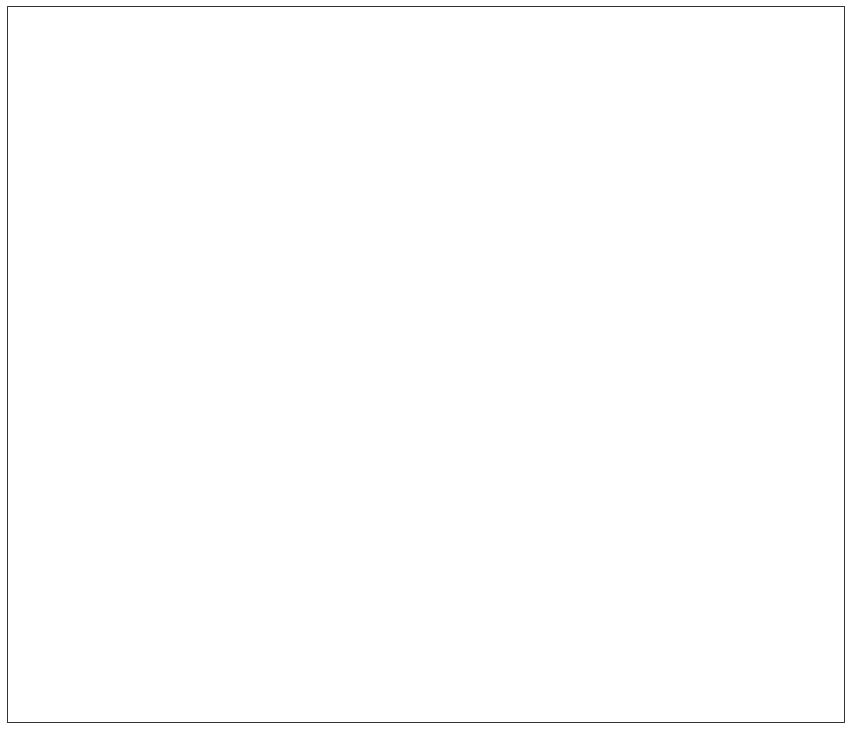

In [44]:
#create map and add the data to it.

myFig = plt.figure(figsize=(15, 15))  # create a figure of size 10x10 (representing the page size in inches)

mycrs = ccrs.UTM(29)  # create a Universal Transverse Mercator reference system to transform our data.
ax = plt.axes(projection=ccrs.Mercator())

In [46]:
#Add the outline of Ireland and the Marine Protected Areas with Cartopy's ShapelyFeature
outline_feature = ShapelyFeature(NIOutline['geometry'], mycrs, edgecolor= 'k', facecolor= 'thistle')
xmin, ymin, xmax, ymax = NIOutline.total_bounds
ax.add_feature(outline_feature)

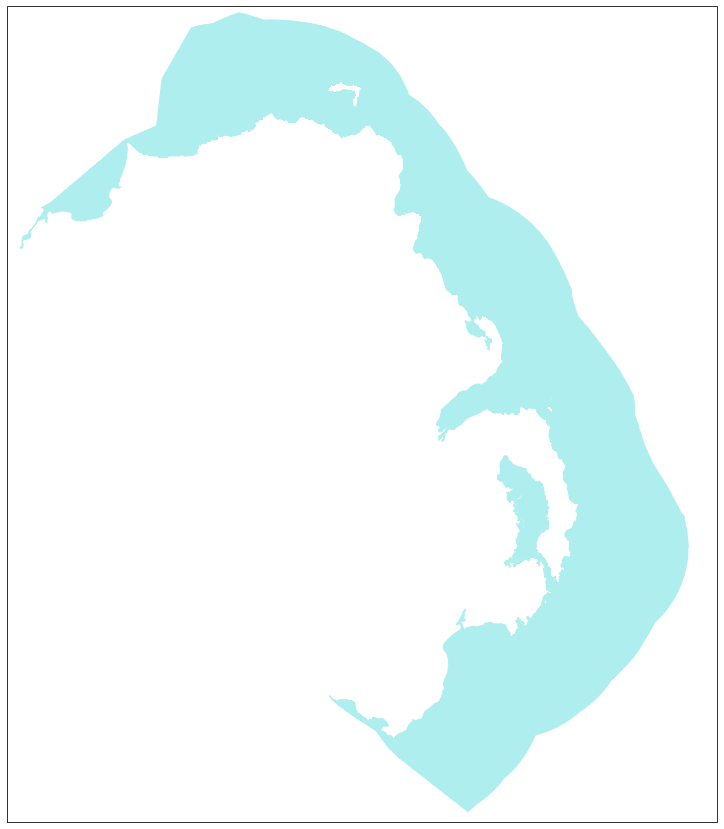

In [47]:
mpa_feature = ShapelyFeature(MPAs['geometry'], mycrs, edgecolor= 'paleturquoise', facecolor= 'paleturquoise', linewidth=1)
xmin, ymin, xmax, ymax = MPAs.total_bounds
ax.add_feature(mpa_feature) #-10.6,51.4,-2.82,55.65 try this again
ax.set_extent([xmin, xmax, ymin, ymax], crs=mycrs)
myFig

In [48]:
#Load point data
Flapperskate = gpd.read_file('Shapefiles/Flapperskate.shp')
SSHound = gpd.read_file('Shapefiles/SSHound.shp')
Spurdog = gpd.read_file('Shapefiles/Spurdog.shp')
Thornback = gpd.read_file('Shapefiles/Thornback.shp')

In [49]:
#Make sure the coordinate system is the same as the outline and MPAs
Flapperskate = Flapperskate.to_crs(epsg=32629)
SSHound = SSHound.to_crs(epsg=32629)
Spurdog = Spurdog.to_crs(epsg=32629)
Thornback = Thornback.to_crs(epsg=32629)

In [50]:
if Flapperskate.crs == Spurdog.crs:
    print('The Flapperskate and Spurdog crs are the same:', Flapperskate.crs, Spurdog.crs)
else:
    print('They do not have the same crs.')
    
print(Spurdog.crs == MPAs.crs)

The Flapperskate and Spurdog crs are the same: epsg:32629 epsg:32629
True


In [51]:
Spurdog.head()

,Date,Year,Location,Lat_,Long_,Decimal_De,Lat1,Long1,Species,Sex__M_F_U,geometry
0,2017-03-10,2017.0,Irish Sea (Nearer to Portaferry),54°21.102,5°17.241,"54.3517, -5.28735",54.351700,-5.287350,Spurdog (S. acanthias),M,POINT (741252.449 6029008.499)
1,2017-04-10,2017.0,Irish Sea,53°30.798,5°49.441,"53.5133, -5.824017",53.513300,-5.824017,Spurdog (S. acanthias),F,POINT (710573.446 5934067.719)
2,2017-05-10,2017.0,Irish Sea,54°06.197,5°18.770,"54.103283, -5.312833",54.103283,-5.312833,Spurdog (S. acanthias),M,POINT (741041.480 6001299.610)
3,2017-05-10,2017.0,Irish Sea,54°06.197,5°18.770,"54.103283, -5.312833",54.103283,-5.312833,Spurdog (S. acanthias),M,POINT (741041.480 6001299.610)
4,2017-05-10,2017.0,Irish Sea,54°06.197,5°18.770,"54.103283, -5.312833",54.103283,-5.312833,Spurdog (S. acanthias),M,POINT (741041.480 6001299.610)


In [52]:
#plot the points

ax.plot(Flapperskate.geometry.x, Flapperskate.geometry.y, 'o', 
        color = 'darkmagenta', linestyle='', transform=mycrs)
ax.plot(SSHound.geometry.x,SSHound.geometry.y, 'o', 
        color = 'g', linestyle='', transform=mycrs)
ax.plot(Spurdog.geometry.x, Spurdog.geometry.y, 'o', 
        color = 'crimson', linestyle='', transform=mycrs)
ax.plot(Thornback.geometry.x, Thornback.geometry.y, 'o', 
        color = 'orange', linestyle='', transform=mycrs)

In [53]:
# Generate handles for the legend

Flapperskate_handle = generate_handles(['Flapperskate'], ['darkmagenta'], alpha=1)
SSHound_handle = generate_handles(['SSHound'], ['g'], alpha=1)
Spurdog_handle = generate_handles(['Spurdog'], ['crimson'], alpha=1)
Thornback_handle = generate_handles(['Thornback'], ['orange'], alpha=1)
MPA_handle = generate_handles(['Marine Protected Areas'], ['paleturquoise'], alpha=1)
NI_handle = generate_handles(['Northern Ireland Outline'], ['thistle'], alpha=1)

handles = Flapperskate_handle + SSHound_handle + Spurdog_handle + Thornback_handle + MPA_handle + NI_handle
labels = ['Flapperskate', 'Starry-Smooth Hound', 'Spurdog', 'Thornback', 'Marine Protected Areas', 'Northern Ireland Outline']

# create a legend
ax.legend(handles, labels, fontsize=10, loc='upper left', frameon= True, framealpha=1,
          title="Legend", title_fontsize=12)

C:\Users\AdminRFJ\anaconda3\envs\Assignment\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\AdminRFJ\anaconda3\envs\Assignment\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\AdminRFJ\anaconda3\envs\Assignment\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\AdminRFJ\AppData\Local\Temp\ipy

ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

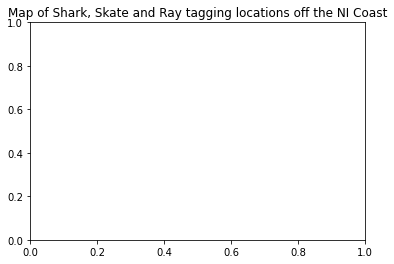

In [54]:
gridlines = ax.gridlines(draw_labels=True,
                         xlocs=[-8, -7.5, -7, -6.5, -6, -5.5],
                         ylocs=[54, 54.5, 55, 55.5])
gridlines.right_labels = False # turn off the right-side labels
gridlines.top_labels = False # turn off the top labels

# Add a title
plt.title('Map of Shark, Skate and Ray tagging locations off the NI Coast')

# Add a scale bar
scale_bar(ax, 20)

myFig.savefig('map.png', bbox_inches='tight', dpi=300) #save figure

In [55]:
# Perform a spatial join for Spurdog tags and MPAs
Spurdogjoin = gpd.sjoin(MPAs, Spurdog, how='inner', op='intersects')
print(Spurdogjoin)

      OBJECTID        ID                     Substrate  Shape_Leng  \
169    31224.0  172478.0  Rock or other hard substrata    0.061035   
3665  173091.0  180338.0              Coarse substrate   17.888623   
3665  173091.0  180338.0              Coarse substrate   17.888623   
3665  173091.0  180338.0              Coarse substrate   17.888623   
3665  173091.0  180338.0              Coarse substrate   17.888623   
3665  173091.0  180338.0              Coarse substrate   17.888623   
3665  173091.0  180338.0              Coarse substrate   17.888623   
3665  173091.0  180338.0              Coarse substrate   17.888623   
3665  173091.0  180338.0              Coarse substrate   17.888623   
3665  173091.0  180338.0              Coarse substrate   17.888623   
3665  173091.0  180338.0              Coarse substrate   17.888623   
3665  173091.0  180338.0              Coarse substrate   17.888623   
3665  173091.0  180338.0              Coarse substrate   17.888623   
3665  173091.0  1803

In [56]:
# Perform a spatial join for Flapperskate tags and MPAs
FSkatejoin = gpd.sjoin(MPAs, Flapperskate, how='inner', op='intersects')
print(FSkatejoin)

      OBJECTID        ID                     Substrate  Shape_Leng  \
2396  169348.0  172098.0  Rock or other hard substrata    0.086418   
2654  169699.0  172871.0              Coarse substrate    0.031286   
3633  172963.0  180089.0                Mixed sediment    0.065996   
3639  172979.0  180121.0  Rock or other hard substrata    0.031131   
3639  172979.0  180121.0  Rock or other hard substrata    0.031131   
...        ...       ...                           ...         ...   
4135  175655.0  185004.0              Coarse substrate    4.629775   
4135  175655.0  185004.0              Coarse substrate    4.629775   
4135  175655.0  185004.0              Coarse substrate    4.629775   
4223  176096.0  185682.0              Coarse substrate    1.446973   
4223  176096.0  185682.0              Coarse substrate    1.446973   

      Shape_Area                                           geometry  \
2396    0.000262  POLYGON ((676242.543 6126443.522, 676243.896 6...   
2654    0.000018 

In [57]:
# Rename the Sex__M_F_U column to Male_Female
FSkatejoin.rename(columns={'Sex__M_F_U': 'Male_Female', 'Decimal_De': 'DD'}, inplace=True)
Spurdogjoin.rename(columns={'Sex__M_F_U': 'Male_Female', 'Decimal_De': 'DD'}, inplace=True)

In [58]:
# Calculate the total number of Spurdog tags located in the MPA
Spurdogjoin['count']=1
Spurdogjoin.groupby(['Species']).sum()

,OBJECTID,ID,Shape_Leng,Shape_Area,index_right,Year,Lat1,Long1,count
Species,,,,,,,,,
Spurdog (S. acanthias),8906747.0,9464797.0,338.81477,6.710019,5553,105027.0,2857.564993,-300.295289,52


In [59]:
# Then Calulate how many are female
MaleOrFemale = Spurdogjoin.Male_Female.value_counts().F
print(MaleOrFemale)

44


In [60]:
# Once again calulate the total number of flapperskate tags within the MPA
FSkatejoin['count'] = 1
FSkatejoin.groupby(['Species']).sum()

,OBJECTID,ID,Shape_Leng,Shape_Area,index_right,Year,Lat1,Long1,count
Species,,,,,,,,,
Common Skate (Dipturus batis),21884284.0,22859299.0,1186.610859,24.294445,8409,254539.0,6925.293572,-737.005013,126


In [61]:
# Then calculate the number of females
MOrF = FSkatejoin.Male_Female.value_counts().F
print(MOrF)

59


<function matplotlib.pyplot.show(close=None, block=None)>

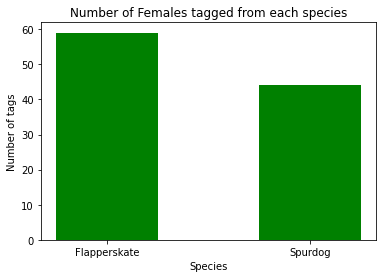

In [62]:
# Once the number of female tags is calculated plot the numbers of a bar chart
data_dict = {'Flapperskate':59, 'Spurdog': 44}
Species = list(data_dict.keys())
Values = list(data_dict.values())

plt.bar(Species, Values, color = 'green', width = 0.5)
plt.ylabel('Number of tags')
plt.xlabel('Species')
plt.title('Number of Females tagged from each species')

plt.show